## 1. Interpretation of a Classic Dataset ( Iris dataset)

#### Part 1 : In this section, general obervations on the Iris dataset will be made, followed by analyzing the seperability of the 3 different Iris flower species properties (setosa, versicolor, virginica).
####  The following code generates pair plots on jupyter, to give a deeper analysis on how several features of individual flower species compare to one another.  For simplicity, the " seaborn" library, provided by Sci-kit learn will be utilized to generate pair plots.

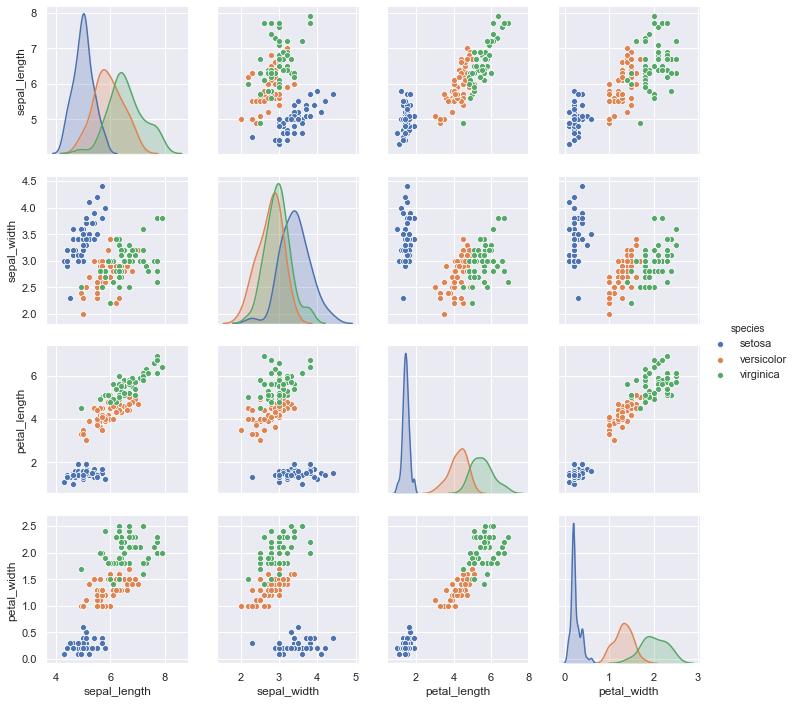

In [69]:
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt
#loading the dataset into our program
Df = sns.load_dataset("iris")

#Creating pairplots on the dataset provided, and segregating different flower species with a unique color to classify better.
iris_plot = sns.pairplot(Df, hue="species")

#### > General Observations - The diagonal list of density fucntions, represent the marginal density of the distribution.  While the rest of the scatterplots represent the Joint distribution between individual features ( In a way, this helps to correlate every feature with another). 

####  > Seperability-  From the plots obtained above, we observe that : The "Setosa" class of Iris species, which is marked in blue, is quite distinctly and linearly seperated from the other two classes(Versicolor, Virginica) in every scatterplot. On the contrary, the two classes(Versicolor, Virginica) are not easily seperable from one another, due to the overlapping of their Convex hulls.  

####  > Conclusion : We can say that, " Versicolor" and "Virginica" species of Iris class are not linearly seperable because of being overlapped. While on the other hand, the class "Setosa" is lineraly seperable.

## 2. : Classification of data by KNN classifier.

### Part 1 : Here, the data has to be split into 60% as training, 20% testing and the rest 20% as validation set (as can be seen below). Since the train_test_split fucntion only allows splitting up of data into two, therefore the split has been carried out twice to achieve our required split ( the shape of each set, can be observed below)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris=load_iris()
X=iris.data
y=iris.target
print(X)
print(y)
# data is split into 80% training, 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#The training data is split into 75% training, 25% validation data.
#This creates a 60% training, 20% validation data split on the entire dataset.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#### > As seen above, the data has been split into 90 datasets for training (60% of the entire data) and 30 datasets(20% of the entire dataset ) each for validation and test set respectively.

### Part 2: The following program, involves training the data on default parameters of the classifier. As can be seen below "KNeighboursClassifier" fucntion is set all to default values ( n_neighbours= 5, is a default value) . Once the model has been trained, the model is tested on the test set, as shown below. The accuracy of the model is then stored in "accu_scr".

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# The function below is set to default.(the default values can be seen in the output section)
knn_data = KNeighborsClassifier()
print(knn_data)
# The following function is utilized to train on the training set and  create a model. 
knn_data.fit(X_train, y_train)
# After training on the X_train set, the model is mapped to the X_test dataset and prediction is made.
predicted_y_data = knn_data.predict(X_test)
# Accuracy of the model is meausred, using the accuracy_score fucntion from metrics in sklearn.
accu_scr = metrics.accuracy_score(y_test,predicted_y_data)
print("The accuracy of the dataset with default classifier data (K=5)=" ,accu_scr*100)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
The accuracy of the dataset with default classifier data (K=5)= 96.66666666666667


#### > The above observation indicates an accuracy of 96.66667% on test data, when the parameters were set to default. ( It is best to retrain the model and test on the cross-validation set, just to prevent over-fitting of data).

### Part 3 : The goal here is to find the the best parameter(with higest accuracy) and re-train the model on that basis. For this purpose, the data has been first tested on the validation set. This is followed by storing the accuracy of individual models, and plotting a graph between "value of k" vs " Accuracy at each K". 

[0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333]


Text(0, 0.5, 'Calculated respective accuracy')

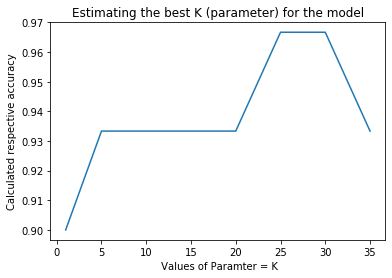

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
k_param = [1, 5, 10, 15, 20, 25, 30, 35]
accu_scr_param ={}
accu_scr_param_list=[]
for k in k_param :
    knn_data = KNeighborsClassifier(n_neighbors=k)
    knn_data.fit(X_train, y_train)
    # Testing is carried out on the validation set "X_val", followed by making prediction on the set.
    predicted_y_data = knn_data.predict(X_val)
    accu_scr_param[k] = metrics.accuracy_score(y_val,predicted_y_data)
    #Storing all the accuracy scores in a list, makes it much easier while plotting data.
    accu_scr_param_list.append(metrics.accuracy_score(y_val,predicted_y_data))
print(accu_scr_param_list)
# Plotting of data to get a better understanding on the accuracies
plt.plot(k_param,accu_scr_param_list)
plt.title("Estimating the best K (parameter) for the model")
plt.xlabel(" Values of Paramter = K")
plt.ylabel("Calculated respective accuracy")

#### >  The graph above provides the statistics required to re-train the model. As per the graph it is clearly indicative that, at k = [25,30] the accuracy is at it's highest (96.67%). Therefore, on taking both the "k" values into consideration, the model is re-trained on the training data and tested on test data.

### Part 4 : The data will now be re-trained with a k values = [25,30] and the accuracy of the model will be observed.

[1.0, 1.0]


Text(0, 0.5, 'Calculated respective accuracy')

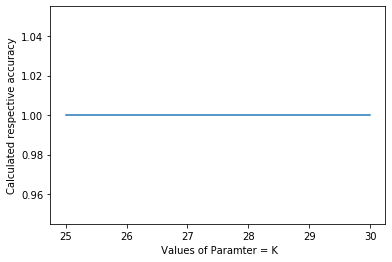

In [5]:
k_param = [25,30]
accu_scr_param ={}
accu_scr_param_list=[]
for k in k_param :
    knn_data = KNeighborsClassifier(n_neighbors=k)
    knn_data.fit(X_train, y_train)
    predicted_y_data = knn_data.predict(X_test)
    accu_scr_param[k] = metrics.accuracy_score(y_test,predicted_y_data)
    accu_scr_param_list.append(metrics.accuracy_score(y_test,predicted_y_data))
print(accu_scr_param_list)
plt.plot(k_param,accu_scr_param_list)
plt.xlabel(" Values of Paramter = K")
plt.ylabel("Calculated respective accuracy")

#### > The above graph indicates an accuracy of 100% on test data, when the parameter chosen was equal to 25 and 30. Therefore,  better accuracy is obtained on test dataset when the best "K" value (hyperparameter) was obtained from the validation set , unlike the case where only the default parameters were taken into consideration. 
#### > Hence it is crucial to take a validation set into account, when the problem deals with several different values of a hyperparameter










## 3. : Classification of data by SVM Linear classifier.

### Part 1: The first half of this section involves splitting up of the data, into 80% training and 20% testing.

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_data =load_iris()
X=iris_data.data
y=iris_data.target
# Train- test data split up, of 80%-20% each respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("The shape of training data is-",X_train.shape)
print("The shape of test data is-",X_test.shape)

The shape of training data is- (120, 4)
The shape of test data is- (30, 4)


### Part 2: This part involves, carrying out 10-fold cross validation of the train-validation set, such that every fold has 90% data dedicated for training, while the rest 10% as a validation set. Once the, accuracy scores are obtained at every fold for different values of the optimization parameter(C). The mean of all the accuracy scores at individual "C_param"   are calculated, and a graph is plotted for the mean accuracy at every "C_param" considered.  The fucntion " svm.SVC " carries out the Linear support vector machines algorithm on the dataset.

#### > In this scenario, a special function "cross_val_score" is being utlized to carry out the 10-fold cross validation on the training data.

[0.9575757575757576, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9423076923076923, 0.933974358974359]


Text(0.5, 1.0, 'Estimating the best C (parameter) for the model')

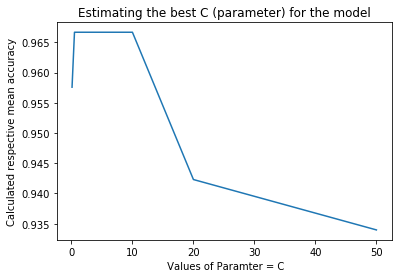

In [8]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
# "C_param" is the regularization parameter for support vector machines
C_param = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
accurate_scr_param ={}
accurate_scr_param_list=[]
for K in C_param :
    #svm.SVC carries out the Linear support vector machines algorithm on the dataset
    svm_clf = svm.SVC(kernel='linear', C=K)
    # The "cv" fucntion within "cross_val_score" indicates the number of cross validation sets generated
    # The 10 fold cross validation is carried out on the Train-validation set.
    accurate_scr_param[K]= cross_val_score(svm_clf, X_train, y_train , cv=10)
    #tabulating mean accuracies of the model
    accurate_scr_param_list.append(accurate_scr_param[K].mean())
print(accurate_scr_param_list)
plt.plot(C_param,accurate_scr_param_list)
plt.xlabel(" Values of Paramter = C")
plt.ylabel("Calculated respective mean accuracy")
plt.title("Estimating the best C (parameter) for the model")

#### > From the plot above it can be observed that, for C_param = [2, 5, 10] the model gives the best accuracy (96.66668%). Therefore, now we can test our model on the test set with the new optimization parameters (C_param = [2, 5, 10]). 

### Part 3 : Testing the model on test data set and reporting the test accuracy

#### > In the following program, testing will be carried out on the test data, while the model will be trained on the train-validation set.

[1.0, 0.9666666666666667, 0.9666666666666667]


Text(0.5, 1.0, 'Estimating the best C (parameter) for the model')

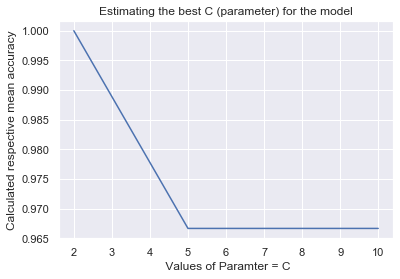

In [47]:
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt 
C_param = [2, 5, 10]
accurate_scr_param ={}
accurate_scr_param_list=[]
for K in C_param :
    svm_clf = svm.SVC(kernel='linear', C=K)
    # Training carried on the train-validation set
    svm_clf.fit(X_train, y_train)
    # Predictions are made on the test dataset.
    predicted_y_data = svm_clf.predict(X_test)
    accurate_scr_param[K]= metrics.accuracy_score(y_test,predicted_y_data)
    accurate_scr_param_list.append(metrics.accuracy_score(y_test,predicted_y_data))
print(accurate_scr_param_list)
plt.plot(C_param,accurate_scr_param_list)
plt.xlabel(" Values of Paramter = C")
plt.ylabel("Calculated respective mean accuracy")
plt.title("Estimating the best C (parameter) for the model")

#### > From the above plot, we can observe that, when C_param = 2 , the test dataset accuracy is 100% in comparison to when C_param = 5, 10 ( 96.66667 % ). 
#### > Therefore, we can conclude that when C_param = 2 , the dataset gives the highest mean accuracy on the test set. With this we can conclude that, opting for a K-fold cross validation set, assisted in hyperparameter tuning. This in turn, made the model make better and accurate predictions, when it was tested on the test dataset.

## 4. Classification of data using a  using  three  tree-based  classifers:   Decision Trees,  Random Forests and Gradient Tree Boosting.

### Part 1: For the first part of this section, the decision trees algorithm will be carried on the iris dataset. The data split carried out here will be similar to the previous section ( A 80%-20% split on train- validation and test set , followed by a 10 fold cross- validation on the train-validation set).The tuning of the parameters will also be carried out using sklearn functions. 

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_data =load_iris()
X=iris_data.data
y=iris_data.target
# Train- test data split up, of 80%-20% each respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("The shape of training data is-",X_train.shape)
print("The shape of test data is-",X_test.shape)

The shape of training data is- (120, 4)
The shape of test data is- (30, 4)


#### > Now, the  Decision Tree Classifier  algorithm will be carried out on the 10-fold cross validated data, for different values of " Maximum depth's" of the "DecisionTreeClassifier" function. The mean accuracy will be tabulated at every fold, and mean accuracy will be plotted against maximum depths.

[0.9332167832167831, 0.9082167832167831, 0.9248834498834497, 0.9165501165501164]


Text(0.5, 1.0, 'Estimating the best maximum depth (parameter) for the model')

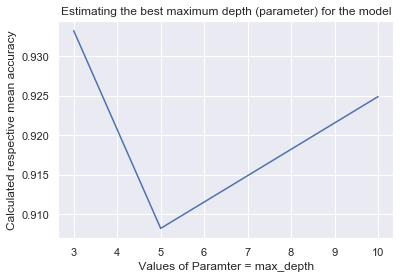

In [182]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
# "max_depth" is the the maximum depth of the tree."none" is the default value.
max_depth = [3, 5, 10, None]
accur_scr_param ={}
accur_scr_param_list=[]
for K in max_depth :
    # DecisionTreeClassifier carries out the Decision Tree Classifier  algorithm on the dataset
    Dtc_clf =  DecisionTreeClassifier(max_depth= K)
    # The "cv" fucntion within "cross_val_score" indicates the number of cross validation sets generated
    # The 10 fold cross validation is carried out on the Train-validation set.
    accur_scr_param[K]= cross_val_score(Dtc_clf, X_train, y_train , cv=10)
    accur_scr_param_list.append(accur_scr_param[K].mean())
print(accur_scr_param_list)
plt.plot(max_depth,accur_scr_param_list)
plt.xlabel(" Values of Paramter = max_depth ")
plt.ylabel("Calculated respective mean accuracy")
plt.title("Estimating the best maximum depth (parameter) for the model")

#### > As can be observed from the above plot, when the maximum depth = 3 of the decision tree, gives the best mean accuracy (93.32%). On the contrary, when the depth of the tree was incresed, the acuuracy started to drop down. Now, we can test the accuracy of the model with a maximum depth of = 3.

In [116]:
from sklearn import metrics
accur_scr_param ={}
accur_scr_param_list=[]
Dtc_clf = DecisionTreeClassifier(max_depth= 3)
# Training carried on the train-validation set
Dtc_clf.fit(X_train, y_train)
# Predictions are made on the test dataset.
predicted_y_data = Dtc_clf.predict(X_test)
accur_scr_param[K]= metrics.accuracy_score(y_test,predicted_y_data)
accur_scr_param_list.append(accur_scr_param[K])
print(accur_scr_param_list)

[1.0]


#### > As can be seen from above, the model gives a 100% accuracy on the test set, for an optimal value of max_depth which was obtained on cross-validation of train-validation set.
#### > With this we can conclude that, opting for a K-fold cross validation set, assisted in hyperparameter tuning. This in turn, made the model make better and accurate predictions, when it was tested on the test dataset.

### Part 2: For the second part, the random forest algorithm will be carried on the iris dataset. In this particular case, a " heat plot " will be devoloped for the mean accuracies  for different values of "number of trees" and "maximum depth".

In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# "num_of_trees" defines the number of trees that are used in the random forest classifier algorithm.
num_of_trees= [5, 10, 50, 150, 200]
# "max_depth" is the the maximum depth of the different number of trees."none" is the default value.
max_depth = [3, 5, 10, None]
acc_scr_param ={}
acc_scr_param_list=[]
#Two "for" loops to incorporate (5*4) mean accuracies, accounting for all the 
for L in num_of_trees:
    for K in max_depth :
        # RandomForestClassifier carries out the Random Forest algorithm on the dataset.
        Rf_clf=  RandomForestClassifier(n_estimators= L ,max_depth= K)
        # The "cv" fucntion within "cross_val_score" indicates the number of cross validation sets generated
        # The 10 fold cross validation is carried out on the Train-validation set.
        acc_scr_param[K]= cross_val_score(Rf_clf, X_train, y_train , cv=10)
        acc_scr_param_list.append(acc_scr_param[K].mean())
print(acc_scr_param_list)

[0.9575757575757574, 0.9409090909090908, 0.9165501165501164, 0.9415501165501166, 0.9332167832167831, 0.9332167832167831, 0.9332167832167831, 0.9409090909090908, 0.9415501165501163, 0.9248834498834497, 0.9248834498834497, 0.9248834498834497, 0.9415501165501163, 0.9248834498834497, 0.9248834498834497, 0.9332167832167831, 0.9415501165501163, 0.9332167832167831, 0.9248834498834497, 0.9332167832167831]


#### > As can be seen above, we incorporated two "for" loops to take into account the number of trees and the maximum depth.Hence, we've obtained 20 different mean accuracies. Our next objective is to plot a heat map for the above mean accuracies.

Text(0.5, 1, 'Estimating the best mean accuracy')

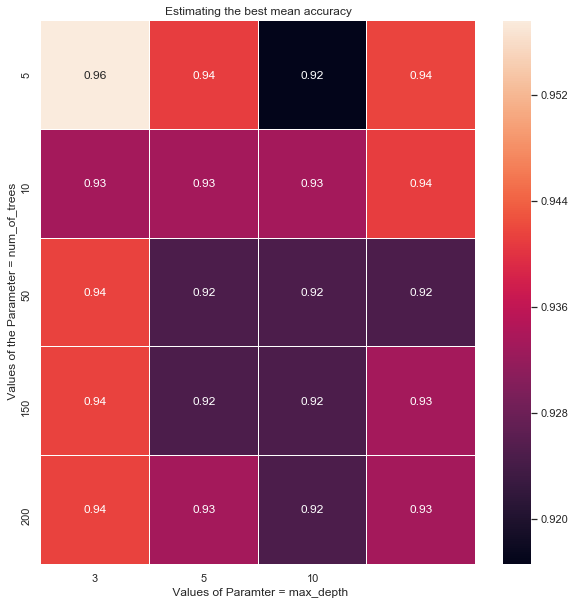

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
# num_of_trees forms the Y-axis of the the heatmap (represented in 2-D vector matrix form in the heat map) 
num_of_trees= [5, 10, 50, 150, 200]
# max_depth forms the X-axis of the the heatmap (represented in 2-D vector matrix form in the heat map) 
max_depth = [3, 5, 10, None]
# Reshaping of the mean accuracies into a 5*4 matrix, helps in correlating the "num_of_trees" and "max_depth"
accu_mean = ((np.asarray(acc_scr_param_list)).reshape(5,4))
fig, ax = plt.subplots(figsize=(10,10))  
x_axis_labels = [3, 5, 10, None]
y_axis_labels = [5, 10, 50, 150, 200]
#Plotting the heatmap using the seaborn function, on the reshaped array
M = sns.heatmap(accu_mean,annot=True, linewidths=.05,square= True, ax=ax,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
# adjusting the x and y limits of the heatplot
bottom, top = M.get_ylim()
M.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel(" Values of Paramter = max_depth")
plt.ylabel(" Values of the Parameter = num_of_trees")
plt.title("Estimating the best mean accuracy")

#### > From the above plot, it can be deduced that at  (max_depth = 3) and (num_of_trees = 10) the random forest algorithm gives the best mean accuracies on the validation sets.Now, the performance of the model can be enumerated from testing on the test dataset with the above parameters. 

In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# "num_of_trees" defines the number of trees that are used in the random forest classifier algorithm.
num_of_trees= [10]
# "max_depth" is the the maximum depth of the different number of trees."none" is the default value.
max_depth = [3]
acc_scr_param ={}
acc_scr_param_list=[]
for L in num_of_trees:
    for K in max_depth :
        # RandomForestClassifier carries out the Random Forest algorithm on the dataset.
        Rf_clf=  RandomForestClassifier(n_estimators= L ,max_depth= K)
        Rf_clf.fit(X_train, y_train)
        predicted_y_data = Rf_clf.predict(X_test)
        acc_scr_param[K]= metrics.accuracy_score(y_test,predicted_y_data)
        acc_scr_param_list.append(acc_scr_param[K])
print(acc_scr_param_list)

[1.0]


#### > As can be seen from above, the model gives a 100% accuracy on the test set, for optimal values of max_depth and num_of_trees, which were obtained by evaluating on the cross-validation of train-validation set.
#### >  With this we can conclude that, opting for a K-fold cross validation set, assisted in hyperparameter tuning. This in turn, made the model make better and accurate predictions, when it was tested on the test dataset.

### Part 3: For the third part, the  Gradient Tree Boosting algorithm will be carried on the iris dataset. In this particular case, the mean accuracy will be tabulated at every fold, and mean accuracy will be plotted against number of estimators.

[0.9325757575757574, 0.9325757575757574, 0.9248834498834497, 0.9165501165501164, 0.9165501165501164]


Text(0.5, 1.0, 'Estimating the best num_of_estimators (parameter) for the model')

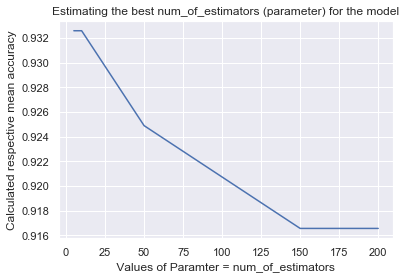

In [181]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
# "num_of_estimators" is the number of boosting stages that will be performed by the Gradient Boosting Classifier .
num_of_estimators= [5, 10, 50, 150, 200]
accur_scr_param ={}
accur_scr_param_list=[]
for K in num_of_estimators :
    # GradientBoostingClassifier carries out the Gradient Boosting Classifier algorithm on the dataset
    GBT_clf =  GradientBoostingClassifier(n_estimators= K)
    # The "cv" fucntion within "cross_val_score" indicates the number of cross validation sets generated
    # The 10 fold cross validation is carried out on the Train-validation set.
    accur_scr_param[K]= cross_val_score(GBT_clf, X_train, y_train , cv=10)
    accur_scr_param_list.append(accur_scr_param[K].mean())
print(accur_scr_param_list)
plt.plot(num_of_estimators,accur_scr_param_list)
plt.xlabel(" Values of Paramter = num_of_estimators ")
plt.ylabel("Calculated respective mean accuracy")
plt.title("Estimating the best num_of_estimators (parameter) for the model")

#### > As can be observed from the above plot that ,as the value of num_of_estimators increases, the mean accuracies start dropping. The model performs the best when the number of estimators are 5, 10. Now, the accuracy of the model is observed on the test dataset.

In [129]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
# "num_of_estimators" is the number of boosting stages that will be performed by the Gradient Boosting Classifier 
num_of_estimators= [5, 10]
accur_scr_param ={}
accur_scr_param_list=[]
for k in num_of_estimators:
       # GradientBoostingClassifier carries out the Gradient Boosting Classifier algorithm on the dataset
    GBT_clf=  GradientBoostingClassifier(n_estimators= K)
    GBT_clf.fit(X_train, y_train)
    predicted_y_data = GBT_clf.predict(X_test)
    accur_scr_param[K]= metrics.accuracy_score(y_test,predicted_y_data)
    accur_scr_param_list.append(accur_scr_param[K])
print(accur_scr_param_list)

[1.0, 1.0]


#### > As can be seen from above, the model gives a 100% accuracy on the test set, for optimal values of num_of_estimators which were obtained from the cross-validation of train-validation set.
#### >  With this we can conclude that, opting for a K-fold cross validation set, assisted in hyperparameter tuning. This in turn, made the model make better and accurate predictions, when it was tested on the test dataset.

## 5. Analysis

### Part 1 : Reasons for splitting of the dataset into train and test sets :
#### > It is crucial to split data into training data and test data, where the training data is the one on which the model is trained, followed by being tested on the test data to make better and accurate predictions of the model.The major task at hand is to prevent over-fitting or under-fitting of the model at any circumstances. 
#### >For instance, if the model is trained very well on training data and fits very close to the training data( almost 100%), then it is likely to be inaccurate when a new dataset is provided to the model. This is specially common in  very complex models, as they tend to have a lot of features. This results in a "Overfitted" model.
#### > Likewise if the model is trained on a very basic and simplistic model, then it is likely to perform worse when complex new data is presented to this simplistic model. This results in an "Underfitted" model.
#### > From the above few scenarios it can be concluded that, it is crucial to split the data into train and testing data, as it gives a better in-depth knowledge on the performance of the model, when new data is presented. 

### Part 2 : Reasons for evaluating on validation set first, instead of the test set directly in KNN :

#### > It is best to evaluate first on a validation set  followed by the test set, since it helps in making a better judgement of which hyperparameter does well on the entire set. Especially in "K" nearest neighbours algorithm, where the performance of the model relies on the hyperparameter. 
#### > For Instance, in the algorithm executed above in section 2 , it can be seen that , for a range of different nearest neighbours ( k =1, 5, 10, 15, 20, 25, 30, 35), a validation set is used to obtain the best "k" , once the best "k" was obtained, the performance of the model was predicted on the test data. This way, finding the best performing model with the best "K" values becomes accurate.

### Part 3:  The effect of changing "K" parameter on KNN, and the effect of it on the model's accuracy as it increases :
#### > As can be observed from the analysis done in section 2, the increase in the value of "K" did tend to increase the accuracy, but as the value of "K" approched the maximum in the list (K=35) the accuracy dropped again.
#### > The above instance clearly indicates why the algorithm is "non-parametric" in nature, since the value of K is dependent on the amount of data, and not the parameter itself. Hence,there's no valid rule of thumb to justify a trend ( except of course the data itself), i.e; an increase/decrease in "k" may not neccasarily effect the model accuracy.

### Part 4: Relative effect of changing the max depths for decision trees and random forests :
#### > As can be observed from the mean accuracy measures of the  respective  classifiers, an increase in the depth of the tress tended to decrese the respective accuracies of the models.
#### > This observation clearly hints towards " over-fitting" since increasing the number of layers within the model tends to make it much complex in nature and perform worse on new data ( Morerover, dosen't capture the useful patterns, tending to increase the testing error ). 
#### > Likewise, having very less depth in the model, can also affect the model as it gives very little flexibility to capture the patterns and interactions in the training data, tending to increase the testing error.
#### >Therefore, in this case to choose the best value of max_depth, the model has been trained with 10-fold cross validation. Hence, providing us with the best value of max_depth.

### Part 5 : Effect of the number of estimators for Gradient Tree Boosting and the relative effect performance of gradient boosting compared with random forest :
#### > Number of estimators correspond to the number of trees present in the forest. It is always a good approach to have a large number of trees, but this might prove to be very computationally expensive. Hence, by K-fold cross validation of the data helps in opting for an optimal number of estimators. ( In our case, K=5,10 were optimal cases).
#### > It is crucial to understand that there are only two parameters that affect the performance of the random forest (number of trees and maximum depth of the tree), while on the other hand three parameters affect the performance of Gradient tree boosting classifier(number of trees, maximum depth of trees and the learning rate). Therefore it is easier to tune the RF classifier model as compared to GBT classifier model.
#### > Moreover, Random forest algorithm is more robust to over-fitting unlike GBT. 
#### > Therefore, performance wise it can be said that the RF algorithm is much faster ( runs in parallel) unlike the GBT which works sequentially.

### Part 6:  The effect of parameter C in the SVM classifier :
#### > The effect of "C" (regularization parameter) on the classifier is crucial as it determines the margin of classification of data. The larger the value, the smaller is the margin of the hyperplane which is used to classify the data. Likewise, if the value of "C" is small, the margin of classification used will be a lot larger, which may lead to misclassifcation of the data.
#### > Again, just like KNN classifier, there's no valid rule of thumb to justify a trend. This is because SVM is "non-parametric " in nature, where the value of "C" is dependant on the data. Therefore, in the algorithm executed above ( section 3) has a K-fold cross validation carried out on the train-validation set, to choose the best value of C, followed by testing the model accuracy on the test model. 